1. Data Cleaning
2. Preprocessing
3. Visualization
4. Poly Models Building
5. Saving the model

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [114]:
df = pd.read_csv('/Users/partha/Desktop/Rainfall-MLOps/data/Rainfall.csv')
df.head(10)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
5,6,1018.8,24.3,20.9,19.2,18.0,84,51,yes,7.7,20.0,14.5
6,7,1021.8,21.4,18.8,17.0,15.0,79,56,no,3.4,30.0,21.5
7,8,1020.8,21.0,18.4,16.5,14.4,78,28,no,7.7,60.0,14.3
8,9,1020.6,18.9,18.1,17.1,14.3,78,79,no,3.3,70.0,39.3
9,10,1017.5,18.5,18.0,17.2,15.5,85,91,yes,0.0,70.0,37.7


In [115]:
df.rename(columns={'         winddirection':'winddirection'}, inplace=True)
df.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [117]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [118]:
df['winddirection'] = df['winddirection'].fillna(df['winddirection'].mean())
df['windspeed'] = df['windspeed'].ffill()

In [119]:
pd.set_option('future.no_silent_downcasting', True)
df['rainfall'] = df['rainfall'].replace({'yes': 1, 'no': 0})

# Data preprocessing

In [120]:
df['Date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')
df.set_index('Date', inplace=True)
if 'day' in df.columns:
    df.drop(columns=['day'], inplace=True)


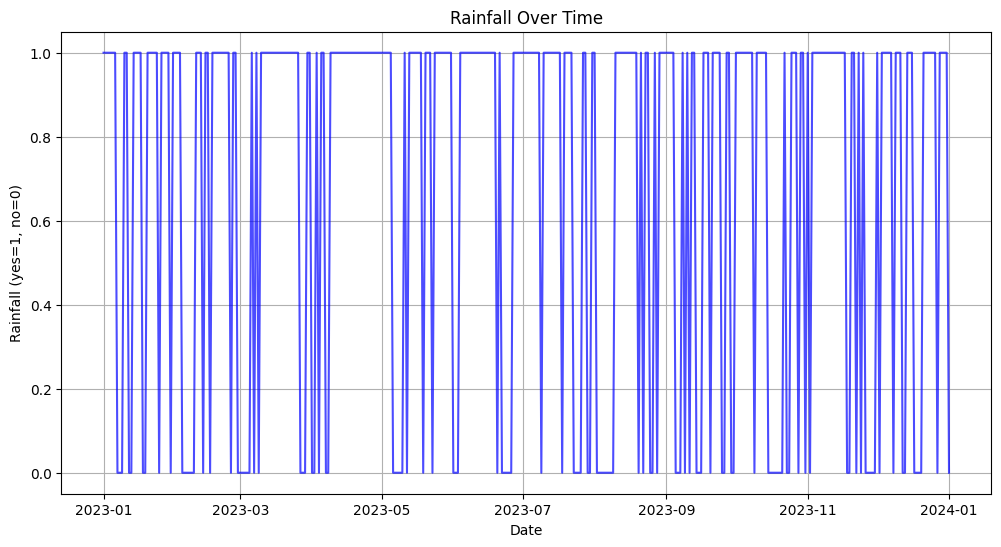

In [121]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['rainfall'], color='blue', alpha=0.7)
plt.title('Rainfall Over Time')
plt.xlabel('Date')
plt.ylabel('Rainfall (yes=1, no=0)')
plt.grid()
plt.show()

In [123]:
df['rainfall'] = pd.to_numeric(df['rainfall'], errors='coerce')
min_max = MinMaxScaler()
df['pressure '] = min_max.fit_transform(df[['pressure ']])
df['humidity '] = min_max.fit_transform(df[['humidity ']])
df['maxtemp'] = min_max.fit_transform(df[['maxtemp']])
df['temparature'] = min_max.fit_transform(df[['temparature']])
df['mintemp'] = min_max.fit_transform(df[['mintemp']])
df['dewpoint'] = min_max.fit_transform(df[['dewpoint']])
df['cloud '] = min_max.fit_transform(df[['cloud ']])
df['sunshine'] = min_max.fit_transform(df[['sunshine']])
df['winddirection'] = min_max.fit_transform(df[['winddirection']])
df['windspeed'] = min_max.fit_transform(df[['windspeed']])



In [125]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [126]:
X = df.drop(columns=['rainfall'])
y = df['rainfall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
base_model_1 = DecisionTreeClassifier(max_depth=5, random_state=42)
base_model_2 = RandomForestClassifier(n_estimators=50, random_state=42)
base_model_3 = GradientBoostingClassifier(n_estimators=50, random_state=42)

base_model_1.fit(X_train, y_train)
base_model_2.fit(X_train, y_train)
base_model_3.fit(X_train, y_train)


GradientBoostingClassifier(n_estimators=50, random_state=42)

In [128]:
train_pred_1 = base_model_1.predict_proba(X_train)[:, 1]
train_pred_2 = base_model_2.predict_proba(X_train)[:, 1]
train_pred_3 = base_model_3.predict_proba(X_train)[:, 1]

meta_train = np.column_stack((train_pred_1, train_pred_2, train_pred_3))

meta_model = LogisticRegression()
meta_model.fit(meta_train, y_train)


LogisticRegression()

In [ ]:
train_pred_1 = base_model_1.predict(X_train)
train_pred_2 = base_model_2.predict(X_train)
train_pred_3 = base_model_3.predict(X_train)

accuracy_1 = accuracy_score(y_train, train_pred_1)
accuracy_2 = accuracy_score(y_train, train_pred_2)
accuracy_3 = accuracy_score(y_train, train_pred_3)

print(f"Accuracy of Base Model 1: {accuracy_1:.4f}")
print(f"Accuracy of Base Model 2: {accuracy_2:.4f}")
print(f"Accuracy of Base Model 3: {accuracy_3:.4f}")
test_pred_1 = base_model_1.predict_proba(X_test)[:, 1]
test_pred_2 = base_model_2.predict_proba(X_test)[:, 1]
test_pred_3 = base_model_3.predict_proba(X_test)[:, 1]

meta_test = np.column_stack((test_pred_1, test_pred_2, test_pred_3))

final_predictions = meta_model.predict(meta_test)

meta_accuracy = accuracy_score(y_test, final_predictions)
print(f"Accuracy of Meta-Model: {meta_accuracy:.4f}")


Accuracy of Base Model 1: 0.9247
Accuracy of Base Model 2: 1.0000
Accuracy of Base Model 3: 0.9555
Accuracy of Meta-Model: 0.7027


In [153]:
from sklearn.model_selection import GridSearchCV

param_grid_base_1 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


param_grid_base_2 = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

param_grid_base_3 = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

param_grid_meta = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# grid_base_1 = GridSearchCV(base_model_1, param_grid_base_1, cv=5, scoring='accuracy', verbose=1)
# grid_base_1.fit(X_train, y_train)
# best_params_base_1 = grid_base_1.best_params_
# print(f"Best Parameters for Base Model 1 (DecisionTreeClassifier): {best_params_base_1}")

# grid_base_3 = GridSearchCV(base_model_3, param_grid_base_3, cv=5, scoring='accuracy', verbose=1)
# grid_base_3.fit(X_train, y_train)
# best_params_base_3 = grid_base_3.best_params_
# print(f"Best Parameters for Base Model 3: {best_params_base_3}")

grid_meta = GridSearchCV(meta_model, param_grid_meta, cv=5, scoring='accuracy', verbose=1)
grid_meta.fit(meta_train, y_train)
best_params_meta = grid_meta.best_params_
print(f"Best Parameters for Meta-Model: {best_params_meta}")


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters for Meta-Model: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [163]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, confusion_matrix
meta_model = LogisticRegression()
meta_model.fit(X_train, y_train)
y_pred = meta_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1:.4f}")

error_rate = 1 - accuracy
print(f"Error Rate: {error_rate:.4f}")

report = classification_report(y_test, y_pred, target_names=['yes', 'no'], output_dict=True)
print("\nClassification Report:\n", report)


Accuracy: 0.7703
Recall: 0.7703
F1-Score: 0.7454
Error Rate: 0.2297

Classification Report:
 {'yes': {'precision': 0.75, 'recall': 0.391304347826087, 'f1-score': 0.5142857142857143, 'support': 23}, 'no': {'precision': 0.7741935483870968, 'recall': 0.9411764705882353, 'f1-score': 0.8495575221238938, 'support': 51}, 'accuracy': 0.7702702702702703, 'macro avg': {'precision': 0.7620967741935484, 'recall': 0.6662404092071611, 'f1-score': 0.681921618204804, 'support': 74}, 'weighted avg': {'precision': 0.7666739319965127, 'recall': 0.7702702702702703, 'f1-score': 0.7453514196877028, 'support': 74}}


In [156]:
accuracy = accuracy_score(y_test, final_predictions)
print(f"Stacking Ensemble Accuracy: {accuracy:.2f}")


Stacking Ensemble Accuracy: 0.70


In [138]:
import joblib

joblib.dump(base_model_1, 'base_model_1.pkl')
joblib.dump(base_model_2, 'base_model_2.pkl')
joblib.dump(base_model_3, 'base_model_3.pkl')
joblib.dump(meta_model, 'meta_model.pkl')

print("All models have been saved successfully.")


All models have been saved successfully.


In [166]:
print(report)

{'yes': {'precision': 0.75, 'recall': 0.391304347826087, 'f1-score': 0.5142857142857143, 'support': 23}, 'no': {'precision': 0.7741935483870968, 'recall': 0.9411764705882353, 'f1-score': 0.8495575221238938, 'support': 51}, 'accuracy': 0.7702702702702703, 'macro avg': {'precision': 0.7620967741935484, 'recall': 0.6662404092071611, 'f1-score': 0.681921618204804, 'support': 74}, 'weighted avg': {'precision': 0.7666739319965127, 'recall': 0.7702702702702703, 'f1-score': 0.7453514196877028, 'support': 74}}


In [177]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, confusion_matrix
from mlflow.models.signature import infer_signature

mlflow.set_experiment("rainfall-pred")
mlflow.set_tracking_uri(uri='http://127.0.0.1:5000/')

y_pred = meta_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
error_rate = 1 - accuracy

report = classification_report(y_test, y_pred, target_names=['yes', 'no'], output_dict=True)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['yes', 'no']))
print("\nConfusion Matrix:\n", cm)

input_example = X_test[:5]
signature = infer_signature(X_test, y_pred)

with mlflow.start_run():
    mlflow.log_params(grid_meta.best_params_)
    mlflow.log_metrics({
        "accuracy": accuracy,
        "recall_class_yes": report['yes']['recall'],
        "recall_class_no": report['no']['recall'],
        "f1_score": report['macro avg']['f1-score']
    })
    mlflow.sklearn.log_model(meta_model, "Stack Model", input_example=input_example, signature=signature)

print("Model and metrics logged successfully!")


Accuracy: 0.7703
Recall: 0.7703
F1-Score: 0.7454
Error Rate: 0.2297

Classification Report:
               precision    recall  f1-score   support

         yes       0.75      0.39      0.51        23
          no       0.77      0.94      0.85        51

    accuracy                           0.77        74
   macro avg       0.76      0.67      0.68        74
weighted avg       0.77      0.77      0.75        74


Confusion Matrix:
 [[ 9 14]
 [ 3 48]]
🏃 View run upbeat-loon-861 at: http://127.0.0.1:5000/#/experiments/493903679373300216/runs/8633285176f941a49b8fe98190322c57
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/493903679373300216
Model and metrics logged successfully!


In [176]:
mlflow.end_run()

In [178]:
model_name = "Stack Model"
run_id = "8633285176f941a49b8fe98190322c57"
model_uri= f'runs:/{run_id}/{model_name}'

with mlflow.start_run(run_id=run_id):
    mlflow.register_model(model_uri=model_uri, name=model_name)

Successfully registered model 'Stack Model'.
2024/12/19 11:46:56 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Stack Model, version 1


🏃 View run upbeat-loon-861 at: http://127.0.0.1:5000/#/experiments/493903679373300216/runs/8633285176f941a49b8fe98190322c57
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/493903679373300216


Created version '1' of model 'Stack Model'.


In [179]:
from mlflow.models import validate_serving_input

model_uri = 'runs:/8633285176f941a49b8fe98190322c57/Stack Model'

# The model is logged with an input example. MLflow converts
# it into the serving payload format for the deployed model endpoint,
# and saves it to 'serving_input_payload.json'
serving_payload = """{
  "dataframe_split": {
    "columns": [
      "pressure ",
      "maxtemp",
      "temparature",
      "mintemp",
      "dewpoint",
      "humidity ",
      "cloud ",
      "sunshine",
      "winddirection",
      "windspeed"
    ],
    "data": [
      [
        0.1468144044321349,
        0.7500000000000002,
        0.8436363636363635,
        0.8884758364312269,
        0.940959409594096,
        0.7741935483870968,
        0.88,
        0.0,
        0.6470588235294118,
        0.21597096188747733
      ],
      [
        0.695290858725766,
        0.24657534246575347,
        0.27636363636363637,
        0.26765799256505585,
        0.33210332103321033,
        0.6612903225806452,
        0.88,
        0.024793388429752067,
        0.08823529411764705,
        0.30671506352087113
      ],
      [
        0.4155124653739648,
        0.3424657534246576,
        0.4181818181818181,
        0.4609665427509294,
        0.5904059040590406,
        0.9516129032258065,
        0.93,
        0.0,
        0.14705882352941174,
        0.6460980036297641
      ],
      [
        0.4736842105263186,
        0.6575342465753427,
        0.749090909090909,
        0.8029739776951673,
        0.8413284132841328,
        0.7580645161290323,
        0.81,
        0.04132231404958678,
        0.20588235294117646,
        0.4682395644283121
      ],
      [
        0.7257617728531898,
        0.35616438356164387,
        0.3854545454545454,
        0.3977695167286246,
        0.44649446494464945,
        0.6935483870967742,
        0.79,
        0.4132231404958678,
        0.029411764705882353,
        0.08529945553539019
      ]
    ]
  }
}"""

# Validate the serving payload works on the model
validate_serving_input(model_uri, serving_payload)

array([1, 1, 1, 1, 1])

In [181]:
import mlflow
logged_model = 'runs:/8633285176f941a49b8fe98190322c57/Stack Model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)
data = X_test[:50]
# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(data))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1])